In [2]:
#!pip install mplfinance # for plotting renko charts

In [2]:
import pandas as pd
import mplfinance as fplt
import datetime as dt

In [4]:
df = pd.read_csv(r'..\data\nq-aug-1-to-aug-15-2024-for-renko-ipynb-b.txt')

In [3]:
# graph_heading is the file name
graph_heading = 'NQ Aug-1ToAug-15'

In [4]:
# Drop Nonetype
df = df.dropna()

In [5]:
# Add Date and Time to a new column called DateTime
df['DateTime'] = df['Date'] + ' ' + df['Time']

In [6]:
# Convert df['Date'] to Datetime
df['DateTime'] = pd.to_datetime(df['Date'])

In [7]:
df.head()

,Date,Time,Open,High,Low,Close,Up,Down,Volume,DateTime
0,07/31/2024,18:00:05,19593.25,19596.25,19590.75,19593.25,66,58,0.0,2024-07-31
1,07/31/2024,18:00:10,19593.00,19594.75,19592.25,19592.25,20,19,39.0,2024-07-31
2,07/31/2024,18:00:15,19593.25,19594.25,19587.50,19587.50,13,35,48.0,2024-07-31
3,07/31/2024,18:00:20,19587.50,19589.50,19582.25,19582.25,28,37,65.0,2024-07-31
4,07/31/2024,18:00:25,19584.00,19587.00,19583.50,19585.75,15,11,26.0,2024-07-31


In [8]:
# get ohlc from df
ohlcv = df[['DateTime','Open','High','Low','Close', 'Volume']]


In [9]:
# make Datetime index
ohlcv = ohlcv.set_index('DateTime')

In [10]:
ohlcv.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156871 entries, 2024-07-31 to 2024-08-15
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Open    156871 non-null  float64
 1   High    156871 non-null  float64
 2   Low     156871 non-null  float64
 3   Close   156871 non-null  float64
 4   Volume  156871 non-null  float64
dtypes: float64(5)
memory usage: 7.2 MB


In [11]:
ohlcv.head()

,Open,High,Low,Close,Volume
DateTime,,,,,
2024-07-31,19593.25,19596.25,19590.75,19593.25,0.0
2024-07-31,19593.00,19594.75,19592.25,19592.25,39.0
2024-07-31,19593.25,19594.25,19587.50,19587.50,48.0
2024-07-31,19587.50,19589.50,19582.25,19582.25,65.0
2024-07-31,19584.00,19587.00,19583.50,19585.75,26.0


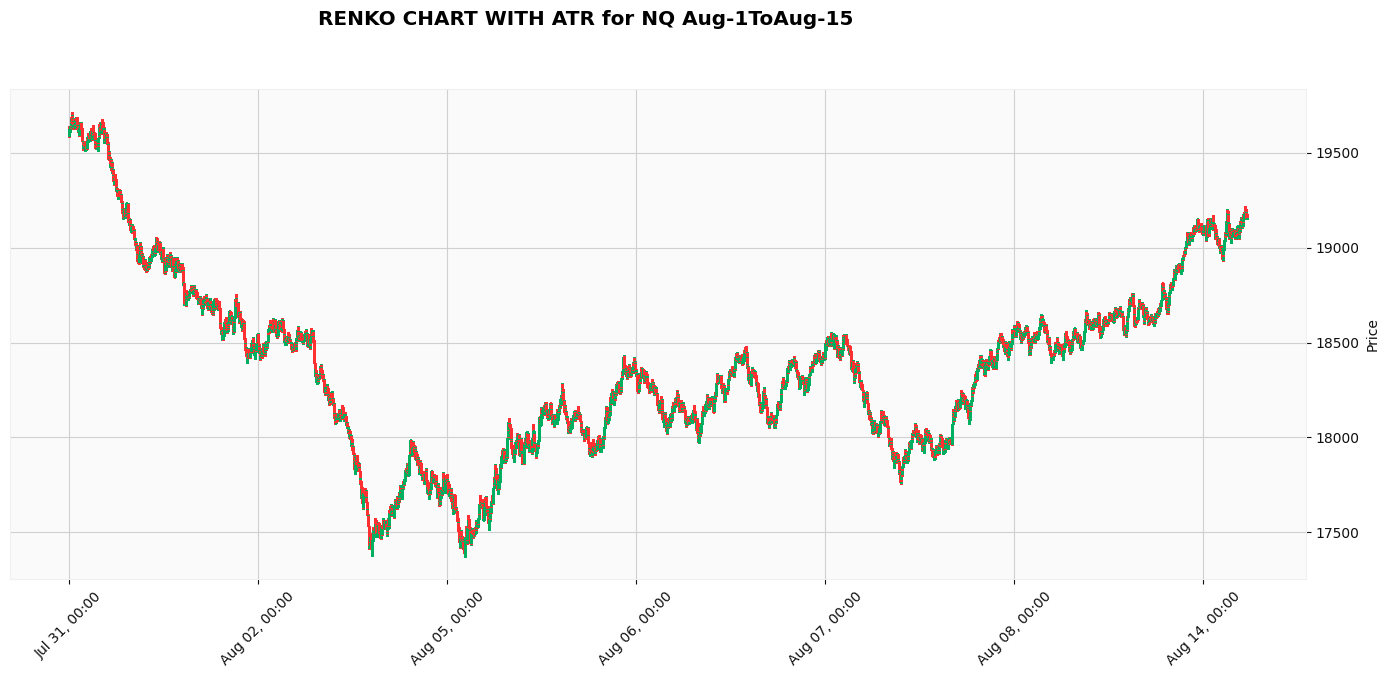

In [12]:
fplt.plot(ohlcv,type='renko',renko_params=dict(brick_size='atr', atr_length=14),
          style='yahoo',figsize =(18,7),
          title = "RENKO CHART WITH ATR for {0}".format(graph_heading))